In [1]:
import sys
sys.path.insert(0, "/Users/yhhan/git/aiclass/0.Professor/")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
%matplotlib inline
# pip install pygraphviz

In [2]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10
model_params_dir = "/Users/yhhan/temp3"

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.SGD.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

Multi Layer Network Model - ID: AO0RE6K6


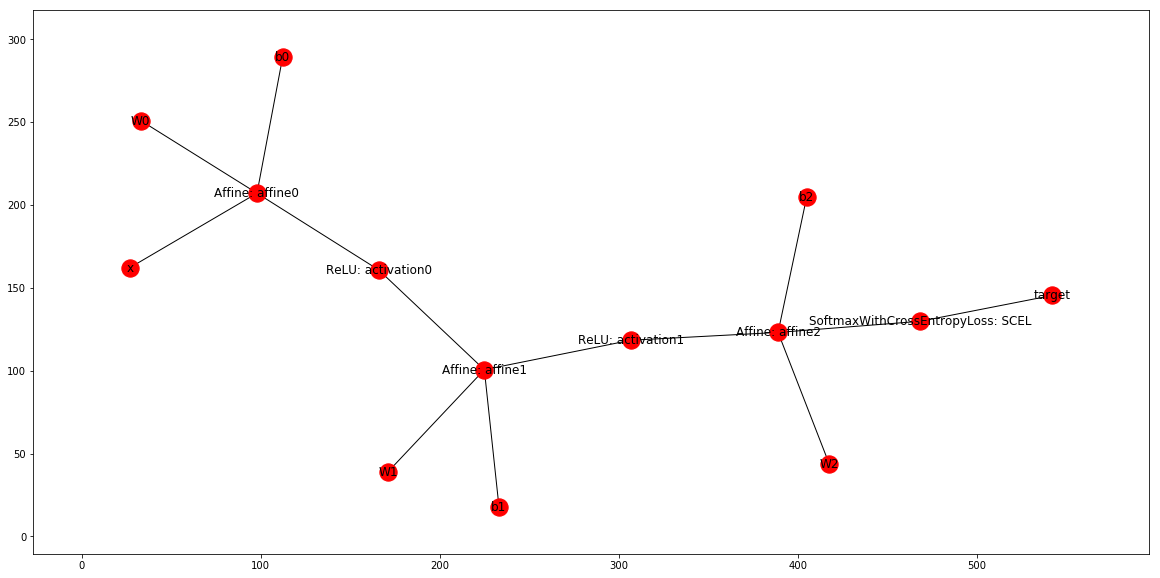

In [3]:
n.draw_and_show(figsize=(20, 10))

In [4]:
#data = mnist.MNIST_Data()
data = mnist.Fashion_MNIST_Data()

In [5]:
forward_final_output = n.feed_forward(input_data=data.test_input)
#print(forward_final_output.shape)
print("Initial Accuracy", tff.accuracy(forward_final_output, data.test_target))

batch_size = 1000
n.learning(max_epoch=50, data=data, batch_size=batch_size, print_period=1, verbose=False)

forward_final_output = n.feed_forward(input_data=data.test_input)
print("Post-learning Accuracy", tff.accuracy(forward_final_output, data.test_target))

Initial Accuracy 0.1131
-- Learning Started --
Epoch   0 Completed - Train Error: 2.292883 - Validation Error: 2.303153 - Test Accuracy: 0.113100
Epoch   1 Completed - Train Error: 0.722755 - Validation Error: 0.724866 - Test Accuracy: 0.733900
Epoch   2 Completed - Train Error: 0.645120 - Validation Error: 0.685545 - Test Accuracy: 0.730700
Epoch   3 Completed - Train Error: 0.562610 - Validation Error: 0.568701 - Test Accuracy: 0.771100
Epoch   4 Completed - Train Error: 0.506178 - Validation Error: 0.479444 - Test Accuracy: 0.821200
Epoch   5 Completed - Train Error: 0.411540 - Validation Error: 0.473170 - Test Accuracy: 0.813400
Epoch   6 Completed - Train Error: 0.438070 - Validation Error: 0.447381 - Test Accuracy: 0.826600
Epoch   7 Completed - Train Error: 0.408499 - Validation Error: 0.428318 - Test Accuracy: 0.834900
Epoch   8 Completed - Train Error: 0.340975 - Validation Error: 0.392096 - Test Accuracy: 0.845300
Epoch   9 Completed - Train Error: 0.406213 - Validation Error

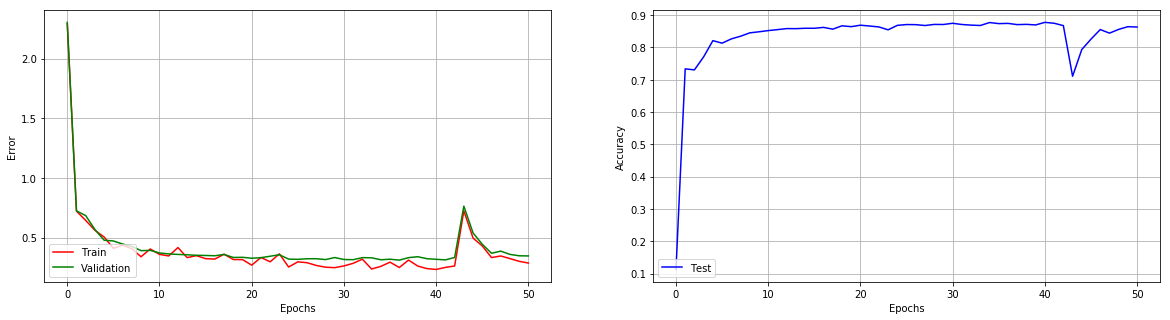

In [6]:
n.draw_error_values_and_accuracy(figsize=(20, 5))

False Prediction Index: 12, Prediction: sandal, Ground Truth: sneaker
False Prediction Index: 17, Prediction: pullover, Ground Truth: coat
False Prediction Index: 23, Prediction: sandal, Ground Truth: ankle_boots
False Prediction Index: 25, Prediction: pullover, Ground Truth: coat
False Prediction Index: 40, Prediction: t_shirt_top, Ground Truth: shirt


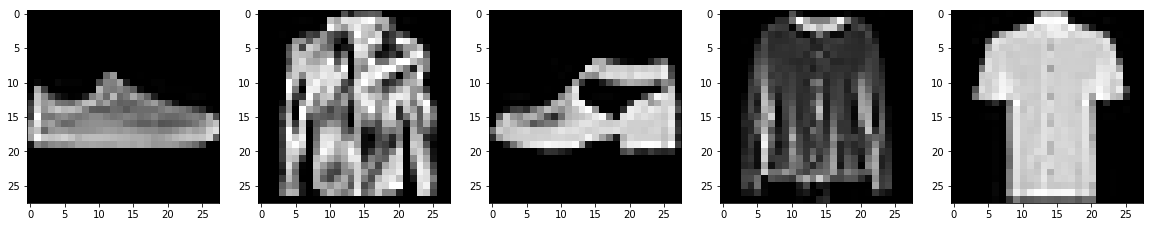

In [7]:
n.draw_false_prediction(data.test_input, data.test_target, data.labels, num=5, figsize=(20, 5))

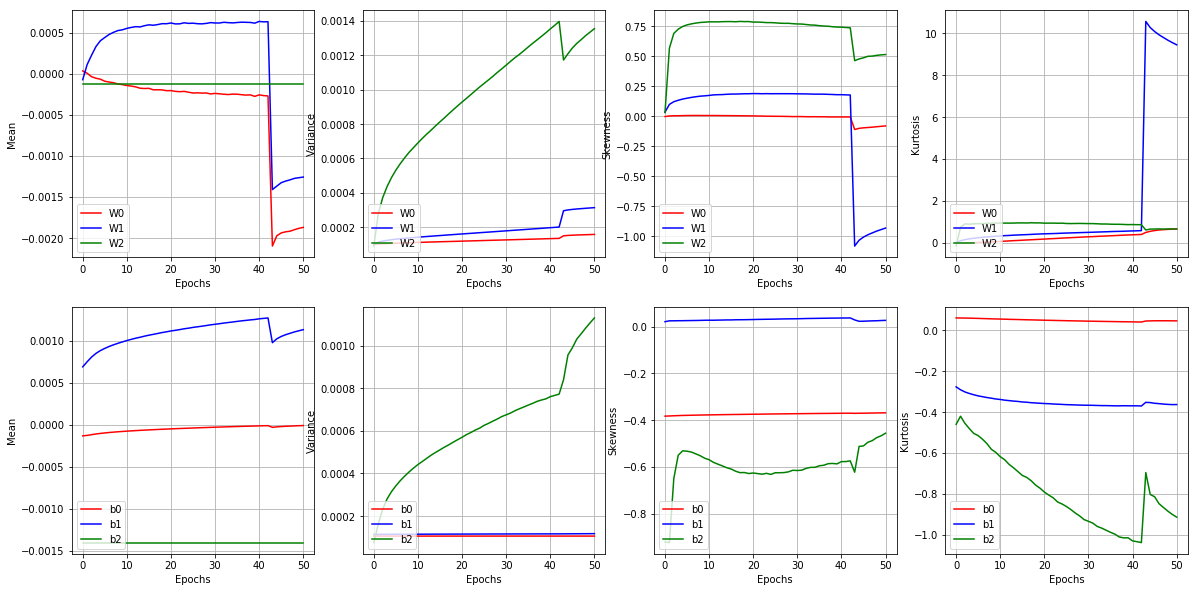

In [8]:
n.draw_param_description(figsize=(20, 10))